In [ ]:
!pip install openai==1.13.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00


In [ ]:
# Add Azure OpenAI package
from openai import AzureOpenAI

In [ ]:
import json

# Flag to show citations
show_citations = True

# Get configuration settings
azure_oai_endpoint ="https://eyuser18.openai.azure.com/"
azure_oai_key ="d56e6ded3af8421e91c86fe5f4227173"
azure_oai_deployment ="turbojose-4o"
azure_search_endpoint = "https://user18search.search.windows.net"
azure_search_key = "kiT2Oebq02ba8BhibDHvT8YOV77XcvDlYUroFJZNvhAzSeAbTVou"
azure_search_index = "index2"

In [ ]:
# Initialize the Azure OpenAI client
client = AzureOpenAI(
            base_url=f"{azure_oai_endpoint}/openai/deployments/{azure_oai_deployment}/extensions",
            api_key=azure_oai_key,
            api_version="2023-09-01-preview")

In [ ]:
# Configure your data source
extension_config = dict(dataSources = [
        {
            "type": "AzureCognitiveSearch",
            "parameters": {
                "endpoint":azure_search_endpoint,
                "key": azure_search_key,
                "indexName": azure_search_index,
            }
        }]
    )

In [ ]:
# Get the prompt
text = input('\nEnter a question:\n')


Enter a question:
How did the small savings schemes performed in Year 2013 and Year 2019? Compare them and tell if there is any trend in these 2 years?


In [ ]:
# Send request to Azure OpenAI model
print("...Sending the following request to Azure OpenAI endpoint...")
print("Request: " + text + "\n")

response = client.chat.completions.create(
    model = azure_oai_deployment,
    temperature = 0.5,
    max_tokens = 1000,
    messages = [
         {"role": "system", "content": "You are a helpful financial analyst"},
         {"role": "user", "content": text}
            ],
            extra_body = extension_config
        )

...Sending the following request to Azure OpenAI endpoint...
Request: How did the small savings schemes performed in Year 2013 and Year 2019? Compare them and tell if there is any trend in these 2 years?



In [ ]:
# Print response
print("Response: " + response.choices[0].message.content + "\n")

Response: In comparing the performance of small savings schemes in the years 2013 and 2019, the following observations can be made:

### Year 2013:
1. **Gross Deposits**: During the financial year 2013-14 (up to October 2013), the gross deposits under various small savings schemes were ₹125,237.67 crore, compared to ₹122,226.30 crore during the same period in the previous year [doc2].
2. **Net Collections**: An amount of ₹24,859.39 crore was proposed to be transferred as the share of net small savings collection to the States and Union Territories during the fiscal year 2013-14 [doc2].
3. **Government Borrowing**: The Central Government’s normal borrowing through the issue of dated securities for financing the fiscal deficit was ₹5,79,000 crore (gross) and ₹4,84,000 crore (net) respectively [doc3].

### Year 2019:
1. **Gross Collections**: For the financial year 2018-19 (up to November 2018), the gross collections under small savings schemes stood at ₹4,01,060.25 crore, representing a 

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt


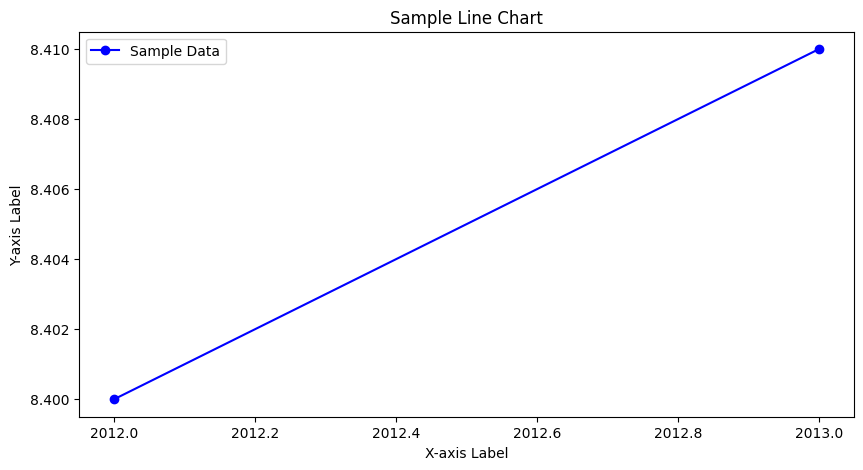

In [ ]:
# Sample data
x = [2013, 2012]
y = [8.41,8.40]

# Create the line chart
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Sample Data')

# Add titles and labels
plt.title('Sample Line Chart')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Add a legend
plt.legend()

# Display the chart
plt.show()

In [ ]:
#Check for the citations
if (show_citations):
    # Print citations
    print("Citations:")
    citations = response.choices[0].message.context["messages"][0]["content"]
    citation_json = json.loads(citations)
    for c in citation_json["citations"]:
        print("  Title: " + c['title'] + "\n    URL: " + c['url'])

Citations:
  Title: SUMMARY REPORT
    URL: https://user18stg.blob.core.windows.net/fileupload-index2/SummaryReport2013.pdf
  Title: SUMMARY REPORT
    URL: https://user18stg.blob.core.windows.net/fileupload-index2/Summary%20Report%20Feb%202019%20Full%20File.pdf
  Title: SUMMARY REPORT
    URL: https://user18stg.blob.core.windows.net/fileupload-index2/Summary%20Report%20Feb%202019%20Full%20File.pdf
  Title: SUMMARY REPORT
    URL: https://user18stg.blob.core.windows.net/fileupload-index2/SummaryReport2013.pdf
  Title: SUMMARY REPORT
    URL: https://user18stg.blob.core.windows.net/fileupload-index2/SummaryReport2013.pdf
